<a href="https://colab.research.google.com/github/PravinV001/Python/blob/Class_N_Colab/In_Class_Linear_Regression_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Data (Bedrooms -> Actual rent in ₹k)

x = np.array([1, 1, 2, 2, 3, 3, 4, 4, 5, 5], dtype=float)
y = np.array([12, 8, 22, 18, 33, 27, 46, 34, 55, 45], dtype=float)

# Create a datframe

df = pd.DataFrame({'Bedrooms': x, 'Rent': y})
df

,Bedrooms,Rent
0,1.0,12.0
1,1.0,8.0
2,2.0,22.0
3,2.0,18.0
4,3.0,33.0
5,3.0,27.0
6,4.0,46.0
7,4.0,34.0
8,5.0,55.0
9,5.0,45.0


In [ ]:
m_values = np.arange(-100.0, 120.0, 0.1)
m_values.shape

(2200,)

In [ ]:
np.mean((df.Rent - (10 * df.Bedrooms)) ** 2)

np.float64(15.6)

In [ ]:

mse_values = np.array([np.mean((df.Rent - (m * df.Bedrooms)) ** 2) for m in m_values])

def mse_loss(random_w, x=df.Bedrooms, y=df.Rent):
  return np.mean((y - np.dot(x, random_w)) ** 2)



In [ ]:
mse_loss(10)

np.float64(15.6)

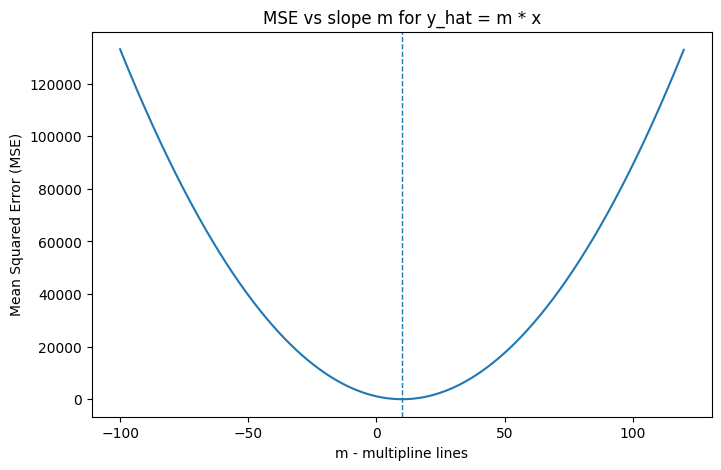

In [ ]:
# Plot: MSE vs m

plt.figure(figsize=(8, 5))
plt.plot(m_values, mse_values)
plt.axvline(10, linestyle="--", linewidth=1)  # marks m=10
# plt.axvline(best_m, linestyle="--", linewidth=1)     # marks best m
plt.title("MSE vs slope m for y_hat = m * x")
plt.xlabel("m - multipline lines")
plt.ylabel("Mean Squared Error (MSE)")
plt.show()

In [ ]:
# mse_loss(60 + h) - mse_loss(60)/(60 + h) - 60 ; h=1e-5

In [ ]:
w = 100
h = 1e-5

mse_w_plus_h = mse_loss(w + h, df.Bedrooms, df.Rent) # y2
mse_w = mse_loss(w, df.Bedrooms, df.Rent) # y1

numerical_gradient = (mse_w_plus_h - mse_w) / h # w + h - w = h
print(f"Numerical gradient at w = {w}: {numerical_gradient}")

Numerical gradient at w = 100: 1980.00011005206


In [ ]:
w - numerical_gradient * 0.01

np.float64(80.1999988994794)

# Let's implement Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Data (Bedrooms -> Actual rent in ₹k)

x = np.array([1, 1, 2, 2, 3, 3, 4, 4, 5, 5], dtype=float)
y = np.array([12, 8, 22, 18, 33, 27, 46, 34, 55, 45], dtype=float)

# Create a datframe

df = pd.DataFrame({'Bedrooms': x, 'Rent': y})
df

,Bedrooms,Rent
0,1.0,12.0
1,1.0,8.0
2,2.0,22.0
3,2.0,18.0
4,3.0,33.0
5,3.0,27.0
6,4.0,46.0
7,4.0,34.0
8,5.0,55.0
9,5.0,45.0


In [ ]:
b = 0

def predict(x, w, b=0):
  return w * x + b


def mse_loss(x, y, w, b=b):
  y_hat = w * x + b
  error = (y_hat - y) ** 2
  return error.mean()

# def mse_loss(random_w, x=df.Bedrooms, y=df.Rent):
#   return np.mean((y - np.dot(x, random_w)) ** 2)



def derivative(w, h=1e-3): # another word for slope
  y1 = mse_loss(x,y, w + h)
  y2 = mse_loss(x, y, w)

  return (y1 - y2)/h


derivative(50)

np.float64(880.0110000011045)

In [ ]:
eta = 10

w = 50

num_steps = 10
current_loss = mse_loss(x, y, w)
grad = derivative(w)

for step in range(num_steps):



  if step % 5 == 0:
          print(f"Step {step:2d} | w = {w:.4f} | loss = {current_loss:.4f} | grad = {grad:.4f}")

  w = w - eta * grad
  current_loss = mse_loss(x, y, w)
  grad = derivative(w)



Step  0 | w = 50.0000 | loss = 17615.6000 | grad = 880.0110
Step  5 | w = 21.5483 | loss = 1482.6062 | grad = 254.0745
Step 10 | w = 13.3339 | loss = 137.8603 | grad = 73.3557
Step 15 | w = 10.9622 | loss = 25.7838 | grad = 21.1791
Step 20 | w = 10.2774 | loss = 16.4467 | grad = 6.1148
Step 25 | w = 10.0797 | loss = 15.6700 | grad = 1.7654
Step 30 | w = 10.0227 | loss = 15.6057 | grad = 0.5097
Step 35 | w = 10.0062 | loss = 15.6004 | grad = 0.1472
Step 40 | w = 10.0014 | loss = 15.6000 | grad = 0.0425
Step 45 | w = 10.0001 | loss = 15.6000 | grad = 0.0123
Step 50 | w = 9.9997 | loss = 15.6000 | grad = 0.0035
Step 55 | w = 9.9995 | loss = 15.6000 | grad = 0.0010
Step 60 | w = 9.9995 | loss = 15.6000 | grad = 0.0003
Step 65 | w = 9.9995 | loss = 15.6000 | grad = 0.0001
Step 70 | w = 9.9995 | loss = 15.6000 | grad = 0.0000
Step 75 | w = 9.9995 | loss = 15.6000 | grad = 0.0000
Step 80 | w = 9.9995 | loss = 15.6000 | grad = 0.0000
Step 85 | w = 9.9995 | loss = 15.6000 | grad = 0.0000
Step 9

In [ ]:
#  y = w * df.Bedrooms